# view 1t and 5 kt coeff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
import os, sys
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import curve_fit

# 1t coeff
#### pe

In [2]:
# fit odd order, even order is 0
def odd_func(x, a, b, c, d, e, f, g, h, i, j):
    return a * x**1 + b * x**3 + c * x**5 + d * x**7 + e * x**9 + f * x**11 + g * x**13 + h * x**15 + i*x**17 + j*x**19
# fit even order, even order is 0
def even_func(x, a, b, c, d, e, f, g, h, i, j):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8 + f * x**10 + g * x**12 + h * x**14 + i*x**16 + j*x**18
# load data



def LoadFileTime(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')

    coeff = 'coeff' + str(order)
    
    data = eval('np.array(h.root.'+ coeff + '[:])')

    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    return data


(15,)
(15, 154)
(15, 154)


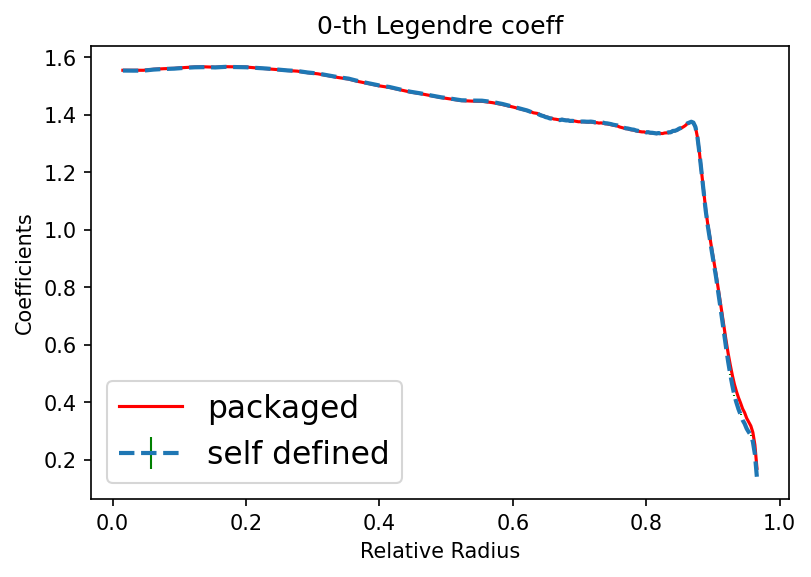

(15, 154)
(15, 154)


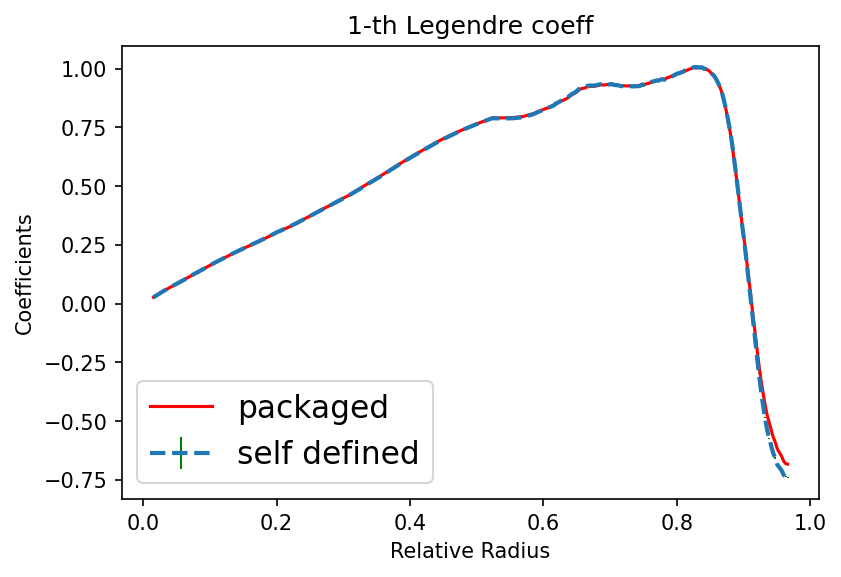

(15, 154)
(15, 154)


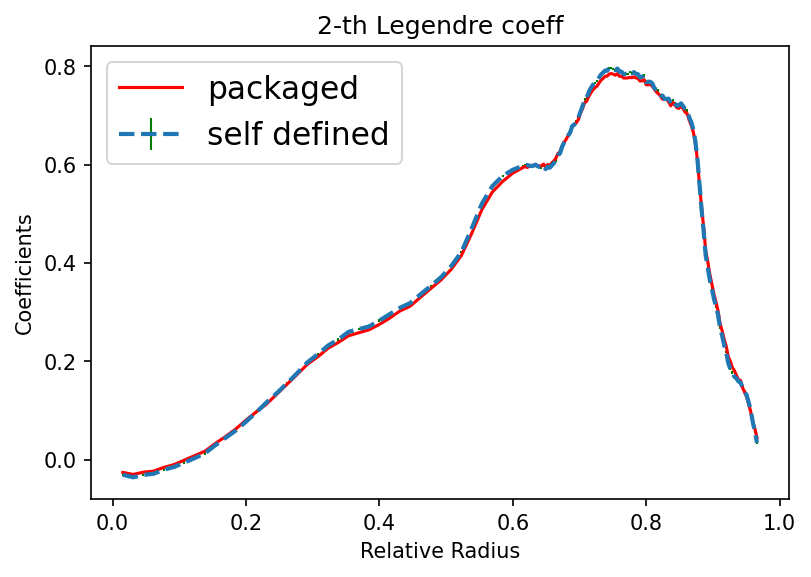

(15, 154)
(15, 154)


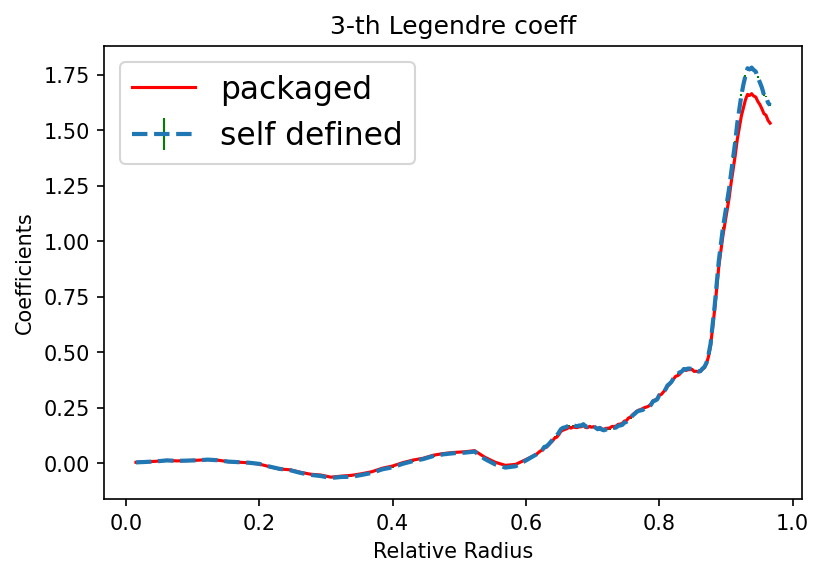

(15, 154)
(15, 154)


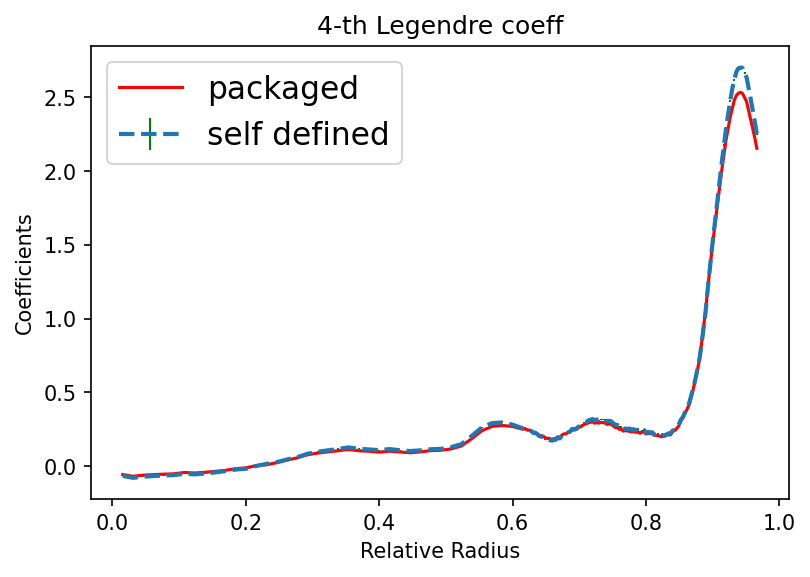

(15, 154)
(15, 154)


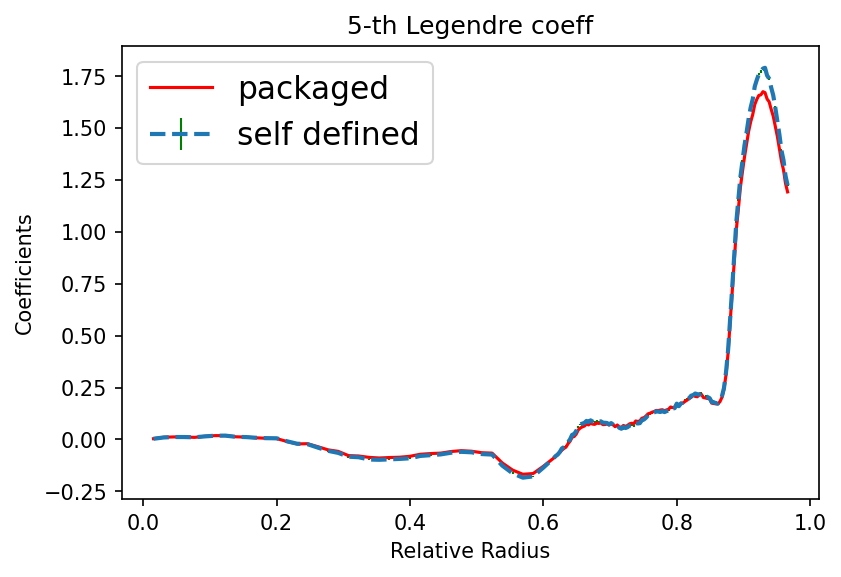

(15, 154)
(15, 154)


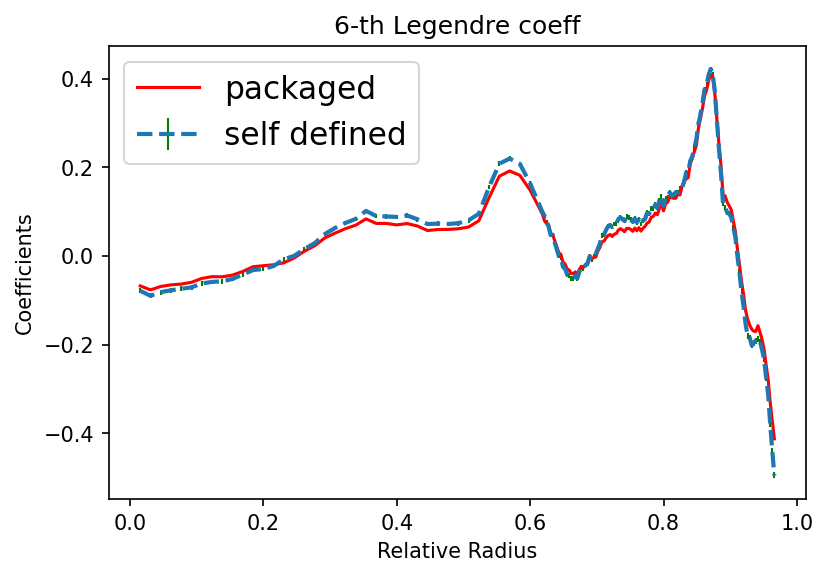

(15, 154)
(15, 154)


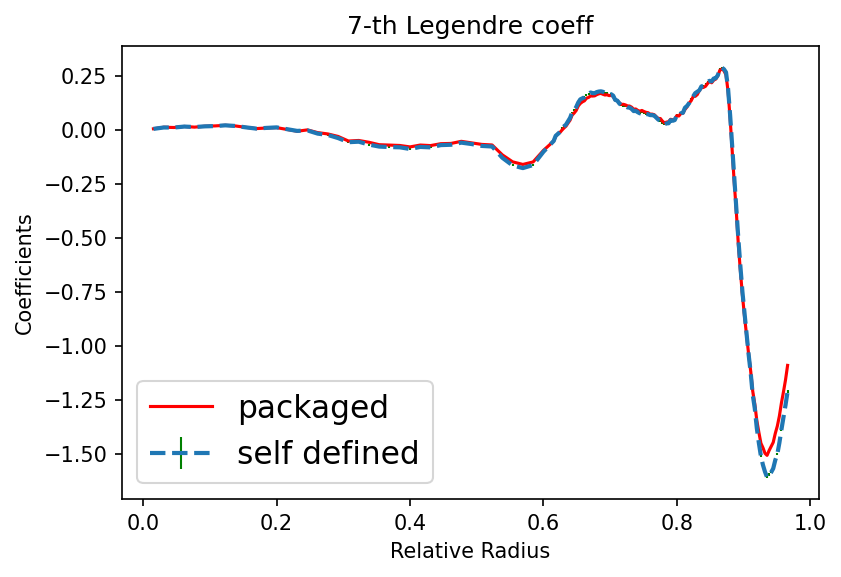

(15, 154)
(15, 154)


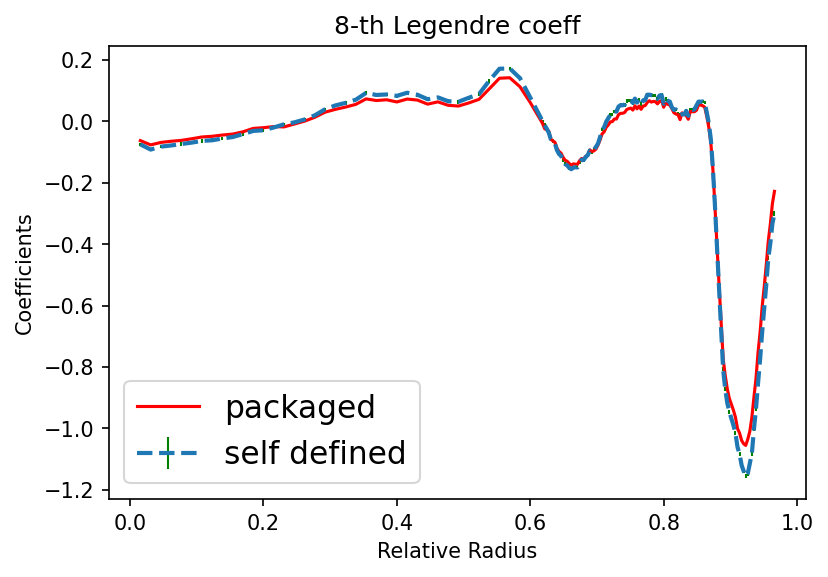

(15, 154)
(15, 154)


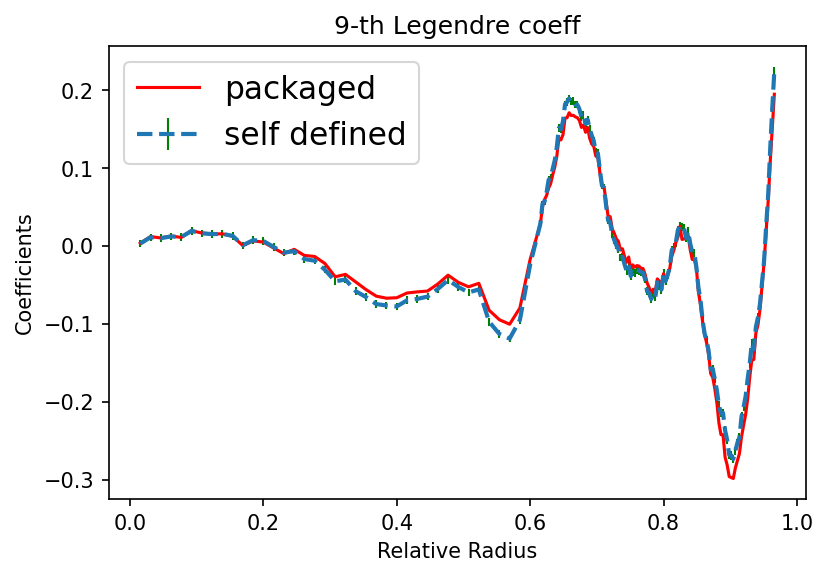

(15, 154)
(15, 154)


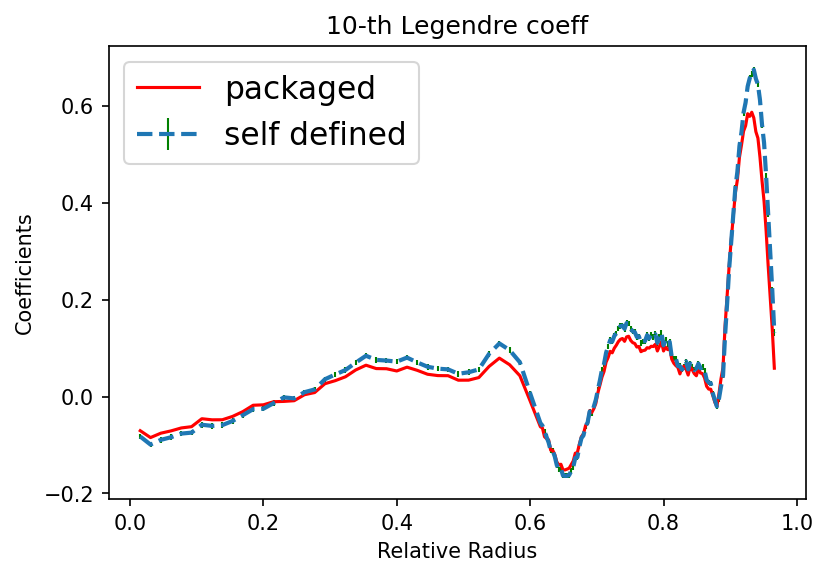

(15, 154)
(15, 154)


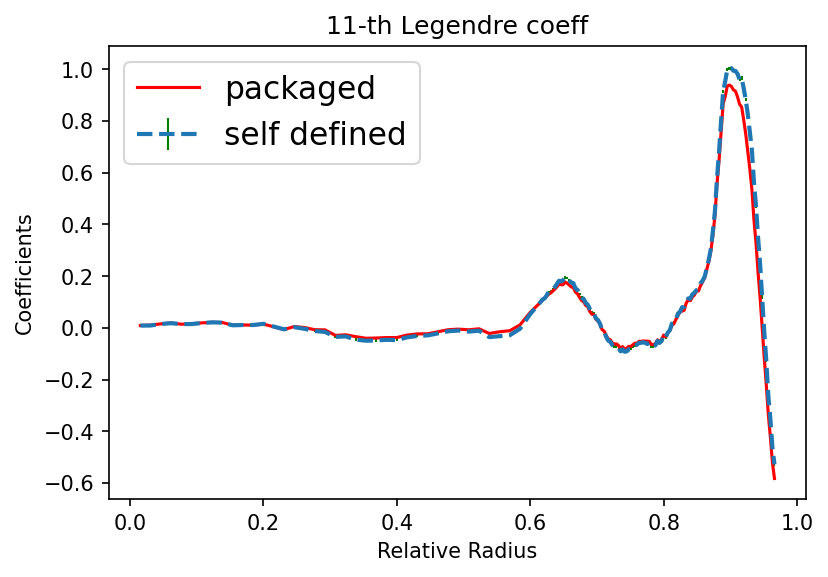

(15, 154)
(15, 154)


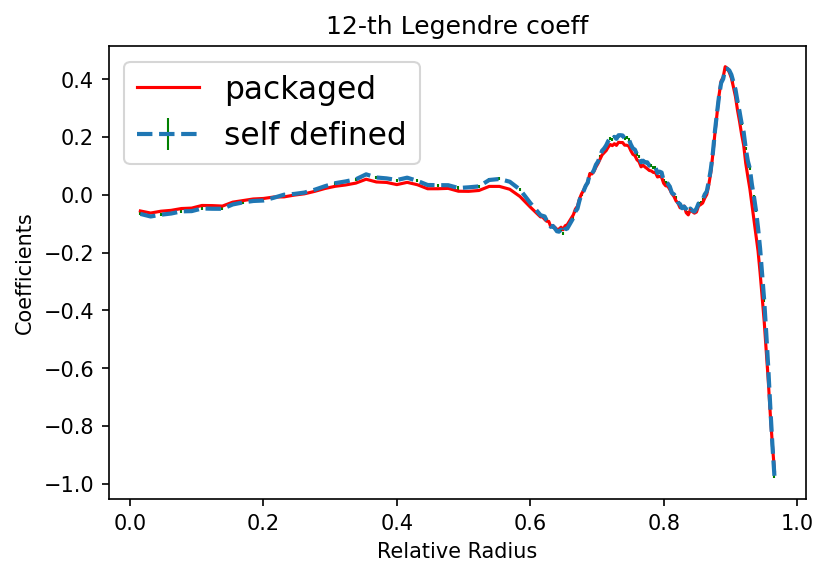

(15, 154)
(15, 154)


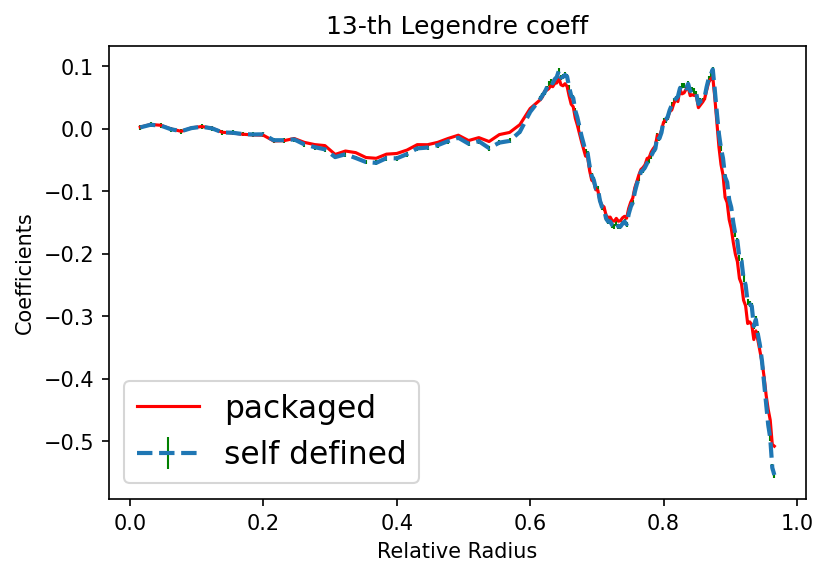

(15, 154)
(15, 154)


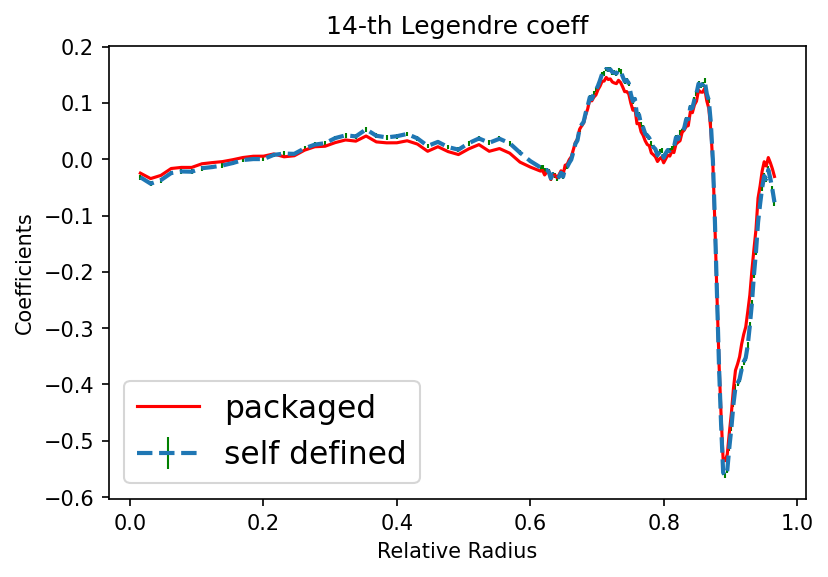

In [24]:
def LoadDataPE_TW(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    h.close()
    return data

def LoadDataPE(path, radius, order):
    data = []
    H = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    H = eval('np.array(h.root.'+ hess + '[:])')
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    h.close()
    return data, H

## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_aic_total1/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
#ra = np.arange(0.01, 0.65, 0.05)
order = 15
coeff_pe = []
err = []
Hessian = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    try:
        coeff= LoadDataPE_TW(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff)) 
    except:
        print('error: %.3f' % radius)


coeff_pe1 = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')

path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els7/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
#ra = np.arange(0.01, 0.65, 0.05)
order = 15
coeff_pe = []
err = []
Hessian = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    try:
        coeff, H = LoadDataPE(path, str_radius, order)
        rd.append(np.array(radius))
        Hessian.append(H)
        coeff_pe = np.hstack((coeff_pe, coeff))
        err = np.hstack((err, np.sqrt(np.diag(np.linalg.pinv(H)))))
    except:
        print('error: %.3f' % radius)

coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
err = np.reshape(err,(-1,np.size(rd)),order='F')
print(coeff_pe[:,0].shape)

for index, i in enumerate(np.arange(np.size(coeff_pe[:,0]))):
    plt.figure(dpi=150)
    print(coeff_pe.shape)
    print(err.shape)
    data = np.nan_to_num(coeff_pe[i,:])
    errorbar = np.nan_to_num(err[i,:])
    x = np.array(rd)/0.65
    #plt.plot(x, data,'.')
    plt.errorbar(x, data, errorbar,ecolor='g', mfc='red', mec='green', elinewidth=1, linewidth=2, label='self defined',linestyle='--')
    if (i == 0):
        plt.plot(np.array(rd)/0.65, coeff_pe1[i,:]+coeff_pe1[i+1,:], color='red',label='packaged')
    else:
        plt.plot(np.array(rd)/0.65, coeff_pe1[i+1,:], color='red',label='packaged')
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(fontsize=15)
    plt.savefig('./fig_view/PE_%d-th Legendre coeff.pdf' % i)
    plt.show()

In [106]:
def LoadDataPE_TW(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    h.close()
    return data

def LoadDataPE(path, radius, order):
    data = []
    H = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    H = eval('np.array(h.root.'+ hess + '[:])')
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    h.close()
    return data, H

## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els7/'

ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
#ra = np.arange(0.01, 0.65, 0.05)
order = 22
coeff_pe = []
err = []
Hessian = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    try:
        coeff= LoadDataPE_TW(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff)) 
    except:
        print('error0: %.3f' % radius)


coeff_pe1 = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')

## gather the data
path = '../coeff_pe_1t_2.0MeV_water_new_aic_1/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
#ra = np.arange(0.01, 0.65, 0.05)

coeff_pe = []
err = []
Hessian = []
rd1 = []
for radius in ra:
    str_radius = '%.3f' % radius
    try:
        coeff= LoadDataPE_TW(path, str_radius, order)
        rd1.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff)) 
    except:
        print('error1: %.3f' % radius)
coeff_pe3 = np.reshape(coeff_pe,(-1,np.size(rd1)),order='F')

## gather the data
path = '../coeff_pe_1t_2.0MeV_notr_new_aic/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
#ra = np.arange(0.01, 0.65, 0.05)

coeff_pe = []
err = []
Hessian = []
rd2 = []
for radius in ra:
    str_radius = '%.3f' % radius
    try:
        coeff= LoadDataPE_TW(path, str_radius, order)
        rd2.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff)) 
    except:
        print('error2: %.3f' % radius)

coeff_pe4 = np.reshape(coeff_pe,(-1,np.size(rd2)),order='F')

path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els7/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
#ra = np.arange(0.01, 0.65, 0.05)
coeff_pe = []
err = []
Hessian = []
rd0 = []
for radius in ra:
    str_radius = '%.3f' % radius
    try:
        coeff, H = LoadDataPE(path, str_radius, order)
        rd0.append(np.array(radius))
        Hessian.append(H)
        coeff_pe = np.hstack((coeff_pe, coeff))
        err = np.hstack((err, np.sqrt(np.diag(np.linalg.pinv(H)))))
    except:
        print('error: %.3f' % radius)

coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
err = np.reshape(err,(-1,np.size(rd)),order='F')
print(coeff_pe[:,0].shape)

#for index, i in enumerate(np.arange(np.size(coeff_pe[:,0]))):
for index, i in enumerate(np.arange(order)):
    plt.figure(dpi=150)
    print(coeff_pe.shape)
    print(err.shape)
    data = np.nan_to_num(coeff_pe[i,:])
    errorbar = np.nan_to_num(err[i,:])
    x = np.array(rd0)/0.65
    #plt.plot(x, data,'.')
    plt.errorbar(x, data, errorbar,ecolor='g', mfc='red', mec='green', elinewidth=1, linewidth=2, label='raw',linestyle='--')
    if (i == 0):
        plt.plot(np.array(rd1)/0.65, coeff_pe3[i,:]+coeff_pe3[i+1,:], color='red',label='Delete reflection(water)')
        plt.plot(np.array(rd2)/0.65, coeff_pe4[i,:]+coeff_pe4[i+1,:], color='green',label='Delete reflection(oil)')
    else:
        plt.plot(np.array(rd1)/0.65, coeff_pe3[i+1,:], color='red',label='Delete reflection(water)',)
        plt.plot(np.array(rd2)/0.65, coeff_pe4[i+1,:], color='green',label='Delete reflection(oil)',linestyle='dashdot')
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(fontsize=15)
    plt.savefig('./fig_view/PE_%d-th Legendre coeff.pdf' % i)
    plt.show()

error0: 0.010
error0: 0.020
error0: 0.030
error0: 0.040
error0: 0.050
error0: 0.060
error0: 0.070
error0: 0.080
error0: 0.090
error0: 0.100
error0: 0.110
error0: 0.120
error0: 0.130
error0: 0.140
error0: 0.150
error0: 0.160
error0: 0.170
error0: 0.180
error0: 0.190
error0: 0.200
error0: 0.210
error0: 0.220
error0: 0.230
error0: 0.240
error0: 0.250
error0: 0.260
error0: 0.270
error0: 0.280
error0: 0.290
error0: 0.300
error0: 0.310
error0: 0.320
error0: 0.330
error0: 0.340
error0: 0.350
error0: 0.360
error0: 0.370
error0: 0.380
error0: 0.390
error0: 0.400
error0: 0.402
error0: 0.404
error0: 0.406
error0: 0.408
error0: 0.410
error0: 0.412
error0: 0.414
error0: 0.416
error0: 0.418
error0: 0.420
error0: 0.422
error0: 0.424
error0: 0.426
error0: 0.428
error0: 0.430
error0: 0.432
error0: 0.434
error0: 0.436
error0: 0.438
error0: 0.440
error0: 0.442
error0: 0.444
error0: 0.446
error0: 0.448
error0: 0.450
error0: 0.452
error0: 0.454
error0: 0.456
error0: 0.458
error0: 0.460
error0: 0.462
error0

ValueError: cannot reshape array of size 0 into shape (0)

In [3]:
import seaborn as sns
for i_index,i in enumerate(np.array(rd)):
    plt.figure(dpi=500)
    #print(i)
    #print(Hessian[i_index])
    ax = sns.heatmap(np.linalg.pinv(Hessian[i_index]), linewidth=.5, annot=True, fmt=".1e",cbar_kws={'format': '%.1e'})
    #plt.contourf(np.linalg.pinv(Hessian[i_index]))
    #print(np.linalg.pinv(Hessian[i_index]))
    #plt.colorbar()
    #cbar = ax.collections[0].colorbar
    #cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], fontsize=16, weight='bold')
    plt.title('Covariance matrix: radius = %.2f m' % i)
    plt.savefig('Cov_%.2f.pdf' % i )
    plt.show()
    plt.figure(dpi=500)
    #print(i)
    #print(Hessian[i_index])
    sns.heatmap(-Hessian[i_index], linewidth=.5, annot=True, fmt=".1e",cbar_kws={'format': '%.1e'})
    #plt.contourf(np.linalg.pinv(Hessian[i_index]))
    #print(np.linalg.pinv(Hessian[i_index]))
    #plt.colorbar()
    plt.title('Hessian matrix: radius = %.2f m' % i)
    plt.savefig('Hess_%.2f.pdf' % i )
    plt.show()

NameError: name 'rd' is not defined

In [46]:
path = '../coeff_pe_1t_2.0MeV_notr_10000_aic_notr/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
#ra = np.arange(0.01, 0.65, 0.05)
order = 15
coeff_pe = []
err = []
Hessian = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius

    coeff, H = LoadDataPE(path, str_radius, order)
    rd.append(np.array(radius))
    Hessian.append(H)
    coeff_pe = np.hstack((coeff_pe, coeff))
    err = np.hstack((err, np.sqrt(np.diag(np.linalg.pinv(H)))))


coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
err = np.reshape(err,(-1,np.size(rd)),order='F')
print(coeff_pe[:,0].shape)

NoSuchNodeError: group ``/`` does not have a child named ``hess15``

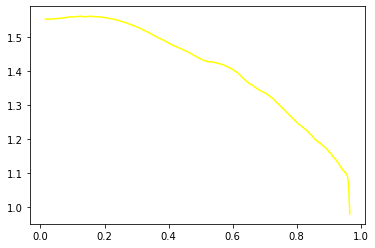

In [42]:
plt.plot(np.array(rd2)/0.65, coeff_pe4[0,:]+coeff_pe4[1,:], color='yellow',label='oil2')

103


ValueError: x and y must have same first dimension, but have shapes (117,) and (0,)

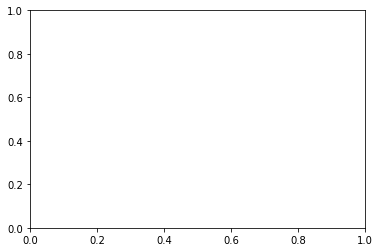

In [96]:
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
rd = []
cmin = []
cnt = 0
for r in ra:
    try:
        h = tables.open_file('../coeff_pe_1t_2.0MeV_notr_new_aic_2/file_%.3f.h5' % r)
        rd.append(r)
        k = np.zeros(24)
        for index, i in enumerate(np.arange(1,24)):
            k[index] = eval('h.root.AIC'+ str(i) + '[()]')
        cnt = cnt + 1
        print(np.array(rd.shape))
        cmin.append(np.where(k==np.min(k))[0][0])
        #print(np.where(k==np.min(k))[0][0])
        #print(rd.shape, cmin.shape)
    except:
        pass
print(cnt)
plt.plot(np.array(rd),cmin)

103


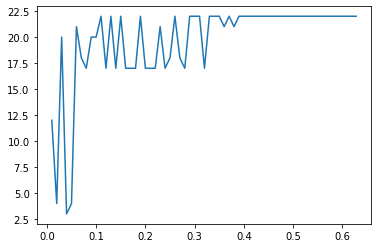

In [99]:
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
rd = []
cmin = []
cnt = 0
for r in ra:
    try:
        h = tables.open_file('../coeff_pe_1t_2.0MeV_notr_new_aic_2/file_%.3f.h5' % r)

        k = np.zeros(24)
        for index, i in enumerate(np.arange(1,24)):
            k[index] = eval('h.root.AIC'+ str(i) + '[()]')
        cnt = cnt + 1
        cmin.append(np.where(k==np.min(k))[0][0])
        rd.append(r)
        #print(np.where(k==np.min(k))[0][0])
        #print(rd.shape, cmin.shape)
    except:
        pass
print(cnt)
plt.plot(np.array(rd),cmin)

In [105]:
h = tables.open_file('../coeff_pe_1t_2.0MeV_notr_new_aic_2/file_0.010.h5')
h.root

/ (RootGroup) ''
  children := ['AIC1' (Array), 'AIC10' (Array), 'AIC11' (Array), 'AIC12' (Array), 'AIC13' (Array), 'AIC14' (Array), 'AIC15' (Array), 'AIC16' (Array), 'AIC17' (Array), 'AIC18' (Array), 'AIC19' (Array), 'AIC2' (Array), 'AIC20' (Array), 'AIC21' (Array), 'AIC22' (Array), 'AIC23' (Array), 'AIC24' (Array), 'AIC3' (Array), 'AIC4' (Array), 'AIC5' (Array), 'AIC6' (Array), 'AIC7' (Array), 'AIC8' (Array), 'AIC9' (Array), 'coeff1' (Array), 'coeff10' (Array), 'coeff11' (Array), 'coeff12' (Array), 'coeff13' (Array), 'coeff14' (Array), 'coeff15' (Array), 'coeff16' (Array), 'coeff17' (Array), 'coeff18' (Array), 'coeff19' (Array), 'coeff2' (Array), 'coeff20' (Array), 'coeff21' (Array), 'coeff22' (Array), 'coeff23' (Array), 'coeff24' (Array), 'coeff3' (Array), 'coeff4' (Array), 'coeff5' (Array), 'coeff6' (Array), 'coeff7' (Array), 'coeff8' (Array), 'coeff9' (Array), 'mean1' (Array), 'mean10' (Array), 'mean11' (Array), 'mean12' (Array), 'mean13' (Array), 'mean14' (Array), 'mean15' (Array